<a href="https://colab.research.google.com/github/how-to-train-your-model/data-science-portfolio/blob/main/Image_Classification_MNIST_Assignment_PP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A.1 First Research/Programming Assignment

# Objective:
 - In this notebook, we will build a DNN model for classifying MNIST digits. The DNN model will consist of 784 input nodes, a hidden layer with 128 nodes and 10 output nodes (corresponding to the 10 digits).
 - We use mnist.load_data() to get the 70,000 images divided into a set of 60,000 training images and 10,000 test images. We hold back 5,000 of the 60,000 training images for validation.
 - After training and evaluating our DNN model we analyze its performance. In particular, we use confusion matrices to compare the predicted classes with the class labels to try to determine why some images were misclassified by the model.
 - We then obtain the 60,000 activation values of one of the hidden nodes for the (original) set of training data. We want to use these activation values as "proxies" for the predicted classes of the 60,000 images.
 - And just like we compared the predicted classes with the class labels using confusion matrices to determine the efficacy of the model, we use box plots to visualize the relationship between the activation values of one hidden node and the class labels. We don't expect these activation values to have much "predictive power". In fact, the same activation values can be associated with multiple class labels resulting in a lot of overlap in the box plots.
 - We also perform similar experiments comparing the values at two pixel locations in the images with the class labels. This time we use scatter plots to visualize the relationship between the pair of pixel values with the class labels (represented by different colored dots).
 - Pixel values at two locations in image should not have much predictive value. To improve on this approach, we the PCA decomposition on both the raw data of 784 pixel values and 128 hidden node activation values to reduce the number of features to 2 in each case. Once again, we use a scatter plot to visualize the correlation between the two principal component values and the class labels.
 - Finally, we use a Random Forest Classifier to find the relative importance of the 784 features (pixels) in the training set. We then select the 70 most important feature (pixels) from the training, validation and test images to test our 'best' model on.

# Importing packages as needed

In [ ]:
import datetime
from packaging import version
from collections import Counter
import numpy as np
import pandas as pd

import matplotlib as mpl  
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as MSE
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score ,precision_recall_fscore_support #for accuracy_score
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten , Input , Dropout
from tensorflow.keras.datasets import mnist
#from plot_keras_history import plot_history

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Allows for muliple output in one cell window
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
 import tensorflow as tf;
 print(tf.__version__);

2.8.2


# Importing train and test datasets from Keras dataset repository

In [ ]:
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.mnist.load_data()

# EDA of datasets

In [ ]:
print('x_train:\t{}'.format(x_train.shape))
print('y_train:\t{}'.format(y_train.shape))
print('x_test:\t\t{}'.format(x_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(60000, 28, 28)
y_train:	(60000,)
x_test:		(10000, 28, 28)
y_test:		(10000,)


In [ ]:
#Reviewing the max and min value in the train dataset
x_train.min(), x_train.max()

(0, 255)

In [ ]:
#Reviewing the max and min value  in the test dataset
x_test.min(), x_test.max()

(0, 255)

In [ ]:
#Reviewing the datatype 
x_train.dtype , x_test.dtype

(dtype('uint8'), dtype('uint8'))

In [ ]:
#Printing few of the observations for review
print("First ten labels training dataset:\n {}\n".format(y_train[0:10]))

First ten labels training dataset:
 [5 0 4 1 9 2 1 3 1 4]



### Missing value check

In [ ]:
#Checking if there is null in x_train or x_test
np.all(np.isnan(x_train)) , np.all(np.isnan(x_test))

(False, False)

No data is missing across all columns

### Reviewing the labels 

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

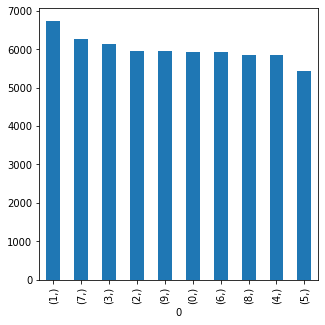

In [ ]:
 #Understanding the frequency of labels for training y 
pd.DataFrame(y_train).value_counts()
pd.DataFrame(y_train).value_counts().plot(kind='bar',figsize=(5, 5) )

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

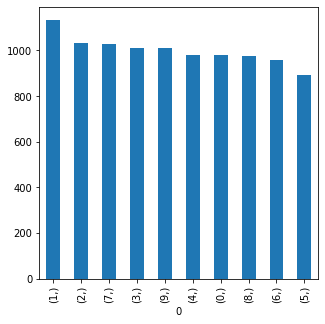

In [ ]:
#Understanding the frequency of labels for test y 
pd.DataFrame(y_test).value_counts()
pd.DataFrame(y_test).value_counts().plot(kind='bar', figsize=(5, 5) )

### Plotting the handwritten images 

Text(0.5, 1.0, '5')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '0')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '4')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '1')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '9')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '2')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '1')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '3')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '1')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '4')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '3')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '5')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '3')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '6')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '1')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '7')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '2')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '8')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '6')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '9')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '4')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '0')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '9')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '1')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '1')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '2')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '4')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '3')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '2')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '7')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '3')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '8')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '6')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '9')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '0')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '5')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '6')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '0')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '7')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '6')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '1')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '8')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '7')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '9')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '3')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '9')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '8')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '5')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '9')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '3')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

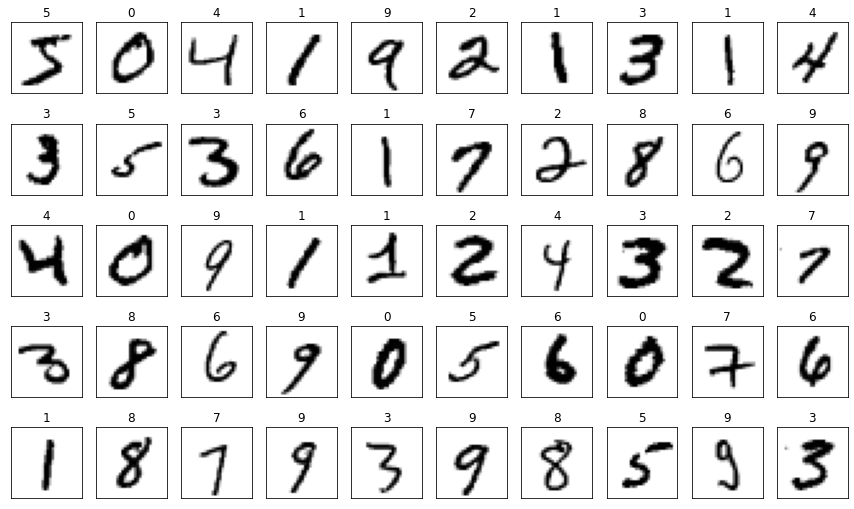

In [ ]:
fig = plt.figure(figsize = (15, 9))

for i in range(50):
    plt.subplot(5, 10, 1+i)
    plt.title(y_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i].reshape(28,28), cmap='binary')

#Preprocessing Data

 - Before we build our model, we need to prepare the data into the shape the network expected
 - More specifically, we will convert the labels (integers 0 to 9) to 1D numpy arrays of shape (10,) with elements 0s and 1s.
 - We also reshape the images from 2D arrays of shape (28,28) to 1D float32 arrays of shape (784,) and then rescale their elements to values between 0 and 1.

In [ ]:
#To flatten it into a 1D array the number of columns of a 28x28 pixel image would be 
print('image_vector_size: ', 28*28 )

image_vector_size:  784


In [ ]:
# Flattening the images to a 1 D array:
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

# Verifying the shape:
print('x_train_reshaped shape: ', x_train_reshaped.shape)
print('x_test_reshaped shape: ', x_test_reshaped.shape)

x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape:  (10000, 784)


Each element in an image is a pixel value where pixel values range from 0 to 255: 
1.   0 = White
2.   255 = Black

In [ ]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


### Rescaling Train and Test samples

In [ ]:
# Normalize from [0:255] => [0.0:1.0]
x_train_norm = np.multiply(x_train_reshaped, 1.0 / 255.0) 
x_test_norm = np.multiply(x_test_reshaped, 1.0 / 255.0) 

In [ ]:
#Reviewing scaling 
x_train_norm.min() , x_train_norm.max()
x_test_norm.min() , x_test_norm.max() 

(0.0, 1.0)

(0.0, 1.0)

##Preparing the data
We set apart 5,000 samples of our training data to use as a validation set. Since we will be using sparse_categorical_crossentropy as the loss function we do not need to use to_categorical to convert the class vector of labels to binary matrix representation.


In [ ]:
#x_train_norm.shape
#val_train, x_train = x_train_norm[:5000], x_train_norm[5000:] 
#val_train.shape
#x_train.shape

#**EXPERIMENT 1 (hidden layer with 1 node, 10 output):** 

Our dense neural network (DNN) will consist of 784 input nodes, a hidden layer with 1 node and 10 output nodes (corresponding to the 10 digits). We use mnist.load_data() to get the 70,000 images divided into a set of 60,000 training images and 10,000 test images. We hold back 5,000 of the 60,000 training images for validation. After training the model, we group the 60,000 activation values of the hidden node for the (original) set of training images by the 10 predicted classes and visualize these sets of values using a boxplot. We expect the overlap between the range of values in the "boxes" to be minimal. In addition, we find the pattern that maximally activates the hidden node as a "warm up" exercise for similar analysis we will perform on CNN models in Assignment 2.

1.   To build a dense neural network that consists of 784 input nodes, a hidden layer with 1 node and 10 output nodes (corresponding to the 10 digits).The requirement is to hold back 5,000 of the 60,000 training images for validation.
2. After training the model, the requirement is to group the 60,000 activation values of the hidden node for the (original) set of training images by the 10 predicted classes and visualize these sets of values using a boxplot.


In [ ]:
# A simple DNN with 784 input nodes, a hidden layer with 1 node and 10 output nodes (corresponding to the 10 digits)
image_size = 784 # 28*28
num_classes = 10 # ten unique digits

model = Sequential()
model.add(Dense(units=1, activation='relu', 
                kernel_regularizer=tf.keras.regularizers.L2(0.001), 
                input_shape=(image_size,)))
model.add(Dense( name = "output_layer", units=num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 785       
                                                                 
 output_layer (Dense)        (None, 10)                20        
                                                                 
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________


A single layer with a single node is similar to employing what is known as a multinomial logit model (logistic regression if there are only two classes).

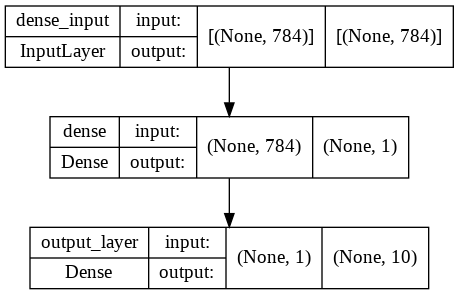

In [ ]:
keras.utils.plot_model(model, "mnist_experiment1.png", show_shapes=True)

In [ ]:
print("Size of Dataset: " , len(x_train_norm))
cross_validation_size = int(len(x_train_norm)*0.08333333333333333)
print("Size of Cross Validation Set: " , cross_validation_size)

Size of Dataset:  60000
Size of Cross Validation Set:  5000


In [ ]:
#Splitting train dataset into train and validation datasets
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train_norm, y_train, test_size=cross_validation_size, random_state=2)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(Y_train ,num_classes = 10)
y_valid_encoded = to_categorical(Y_valid ,num_classes = 10)
y_test_encoded = to_categorical(y_test , num_classes = 10)

## Compiling the model
To make our network ready for training, we need to pick three more things, as part of "compilation" step:
 - A loss function: the is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be able to steer itself in the right direction.
 - An optimizer: this is the mechanism through which the network will update itself based on the data it sees and its loss function.
 - Metrics to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly classified).

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=50,
    mode='auto', baseline=None, restore_best_weights=False)

history = model.fit(
    X_train, y_train_encoded, 
    epochs = 200, batch_size = 64, 
    callbacks = [early_stopping], 
    validation_data = (X_valid,y_valid_encoded))

Epoch 1/200
860/860 [==============================] - 4s 4ms/step - loss: 1.9991 - accuracy: 0.2090 - val_loss: 1.9122 - val_accuracy: 0.2374
Epoch 2/200
860/860 [==============================] - 3s 3ms/step - loss: 1.8684 - accuracy: 0.2347 - val_loss: 1.8164 - val_accuracy: 0.2682
Epoch 3/200
860/860 [==============================] - 3s 3ms/step - loss: 1.7710 - accuracy: 0.2712 - val_loss: 1.7378 - val_accuracy: 0.2852
Epoch 4/200
860/860 [==============================] - 3s 3ms/step - loss: 1.7163 - accuracy: 0.2815 - val_loss: 1.6999 - val_accuracy: 0.2850
Epoch 5/200
860/860 [==============================] - 2s 3ms/step - loss: 1.6884 - accuracy: 0.2849 - val_loss: 1.6773 - val_accuracy: 0.2916
Epoch 6/200
860/860 [==============================] - 2s 2ms/step - loss: 1.6709 - accuracy: 0.2925 - val_loss: 1.6629 - val_accuracy: 0.2910
Epoch 7/200
860/860 [==============================] - 2s 2ms/step - loss: 1.6591 - accuracy: 0.3023 - val_loss: 1.6531 - val_accuracy: 0.3060

Text(0.5, 1.0, 'Training and Validation Accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Training and Validation Loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

<Figure size 432x288 with 0 Axes>

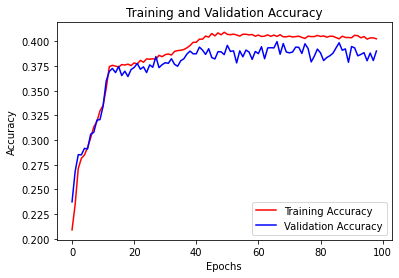

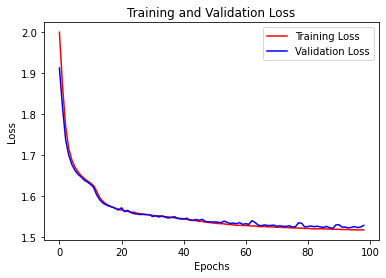

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = "bottom right")
plt.figure()
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = "upper right")
plt.figure()

In [ ]:
#Reviewing validation accuracy , precision and recall
y_pred_valid = model.predict(X_valid)
y_pred_valid = np.argmax(y_pred_valid, axis=1)
print("The accuracy percentage for validation dataset is {}".format(accuracy_score(Y_valid, y_pred_valid)))

The accuracy percentage for validation dataset is 0.3902


In [ ]:
print('The efficiency metrics for DNN Validation data is :')
print(classification_report(Y_valid, y_pred_valid))

The efficiency metrics for DNN Validation data is :
              precision    recall  f1-score   support

           0       0.49      0.37      0.42       523
           1       0.47      0.82      0.60       568
           2       0.22      0.35      0.27       479
           3       0.27      0.44      0.34       496
           4       0.42      0.24      0.31       509
           5       0.22      0.07      0.11       480
           6       0.39      0.38      0.39       493
           7       0.60      0.78      0.68       499
           8       0.28      0.02      0.03       488
           9       0.38      0.35      0.36       465

    accuracy                           0.39      5000
   macro avg       0.37      0.38      0.35      5000
weighted avg       0.38      0.39      0.36      5000



Text(0.5, 1.05, 'Confusion Matrix for Validation dataset is')

Text(33.0, 0.5, 'Predicted Digits')

Text(0.5, 15.0, 'Actual Digits')

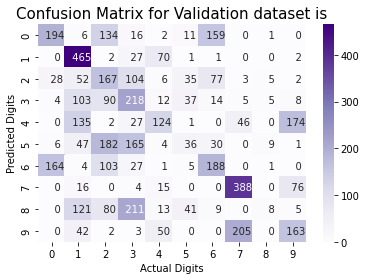

In [ ]:
sns.heatmap(metrics.confusion_matrix(Y_valid, y_pred_valid),annot=True,fmt='5.0f',cmap="Purples")
plt.title('Confusion Matrix for Validation dataset is', y=1.05, size=15)
plt.ylabel('Predicted Digits')
plt.xlabel('Actual Digits')

In [ ]:
#Test data accuracy , precision and recall
y_pred = model.predict(x_test_norm)
y_pred_test =np.argmax(y_pred, axis=1)
print("The accuracy percentage for test dataset is {}".format(accuracy_score(y_test, y_pred_test)))

The accuracy percentage for test dataset is 0.3974


In [ ]:
print('The efficiency metrics for DNN Test data is :')
print(classification_report(y_test, y_pred_test))

The efficiency metrics for DNN Test data is :
              precision    recall  f1-score   support

           0       0.49      0.43      0.46       980
           1       0.49      0.81      0.61      1135
           2       0.24      0.34      0.28      1032
           3       0.27      0.41      0.33      1010
           4       0.44      0.27      0.33       982
           5       0.25      0.10      0.14       892
           6       0.34      0.31      0.32       958
           7       0.60      0.78      0.68      1028
           8       0.30      0.02      0.04       974
           9       0.39      0.38      0.38      1009

    accuracy                           0.40     10000
   macro avg       0.38      0.39      0.36     10000
weighted avg       0.38      0.40      0.36     10000



Text(0.5, 1.05, 'Confusion Matrix for Test dataset is')

Text(33.0, 0.5, 'Predicted Digits')

Text(0.5, 15.0, 'Actual Digits')

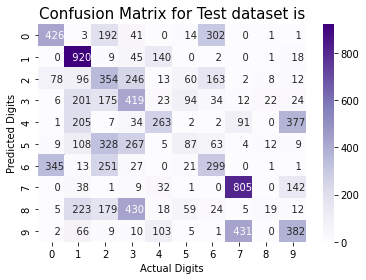

In [ ]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_test),annot=True,fmt='5.0f',cmap="Purples")
plt.title('Confusion Matrix for Test dataset is', y=1.05, size=15)
plt.ylabel('Predicted Digits')
plt.xlabel('Actual Digits')

Plotting the predicted images in the test dataset

<Figure size 864x576 with 0 Axes>

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=0 | pred=0 | true=7')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=1 | pred=0 | true=2')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=2 | pred=0 | true=1')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=3 | pred=0 | true=0')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=4 | pred=0 | true=4')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=5 | pred=0 | true=1')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=6 | pred=0 | true=4')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=7 | pred=0 | true=9')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=8 | pred=0 | true=5')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=9 | pred=0 | true=9')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=10 | pred=0 | true=0')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=11 | pred=0 | true=6')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=12 | pred=0 | true=9')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=13 | pred=0 | true=0')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=14 | pred=0 | true=1')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=15 | pred=0 | true=5')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=16 | pred=0 | true=9')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=17 | pred=0 | true=7')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=18 | pred=0 | true=3')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=19 | pred=0 | true=4')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=20 | pred=0 | true=9')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=21 | pred=0 | true=6')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=22 | pred=0 | true=6')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=23 | pred=0 | true=5')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=24 | pred=0 | true=4')

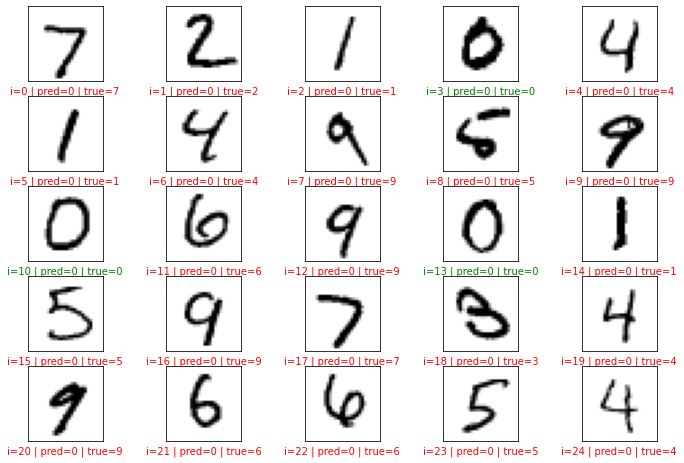

In [ ]:
plt.figure(figsize = (12, 8))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(y_pred_test[start_index + i])
    actual = np.argmax(y_test_encoded[start_index + i])
    col = 'g'
    if pred != actual:
        col = 'r'
    plt.xlabel('i={} | pred={} | true={}'.format(start_index + i, pred, actual), color = col)
    plt.imshow(x_test[start_index + i], cmap='binary')
plt.show()

After training the model, the requirement is to group the 60,000 activation values of the hidden node for the (original) set of training images by the 10 predicted classes and visualize these sets of values using a boxplot.

In [ ]:
# Extracts the outputs of the 2 layers:
layer_outputs = [layer.output for layer in model.layers]

# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

print(f"There are {len(layer_outputs)} layers")
layer_outputs; # description of the layers

There are 2 layers


In [ ]:
x_train_norm.shape

(60000, 784)

In [ ]:
predict_x=model.predict(x_train_norm)
pred_classes = np.argmax(predict_x,axis=1)

In [ ]:
activations = activation_model.predict(x_train_norm)
hidden_layer_activation = activations[0]
hidden_layer_activation.shape 

(60000, 1)

In [ ]:
boxplot_df = pd.DataFrame({'act_value':hidden_layer_activation.reshape(60000),
                           'pred_class':pred_classes})
boxplot_df['pred_class'].value_counts()

1    11694
3     9579
2     8772
7     8021
9     5545
6     5513
0     4774
4     3584
5     2105
8      413
Name: pred_class, dtype: int64

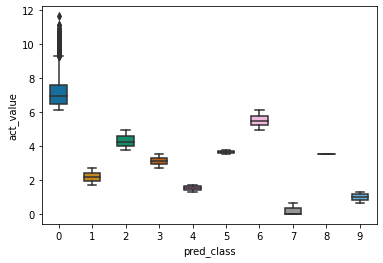

In [ ]:
# Let us use seaborn for the boxplots this time.
import seaborn as sns
bplot = sns.boxplot(y='act_value', x='pred_class', 
                 data=boxplot_df, 
                 width=0.5,
                 palette="colorblind")

In [ ]:
# Get the outputs of all the hidden nodes for each of the 60000 training images
activations = activation_model.predict(x_train_norm)
hidden_layer_activation = activations[0]
output_layer_activations = activations[1]
hidden_layer_activation.shape   #  each hidden nodes has one activation value per training image

(60000, 1)

In [ ]:
output_layer_activations.shape

(60000, 10)

In [ ]:
print(f"The maximum activation value of the hidden nodes in the hidden layer is \
{hidden_layer_activation.max()}")

The maximum activation value of the hidden nodes in the hidden layer is 11.643158912658691


In [ ]:
# Some stats about the output layer as an aside...
np.set_printoptions(suppress = True)  # display probabilities as decimals and NOT in scientific notation
ouput_layer_activation = activations[1]
print(f"The output node has shape {ouput_layer_activation.shape}")
print(f"The output for the first image are {ouput_layer_activation[0].round(4)}")
print(f"The sum of the probabilities is (approximately) {ouput_layer_activation[0].sum()}")

The output node has shape (60000, 10)
The output for the first image are [0.0595 0.0351 0.2164 0.1901 0.0055 0.2133 0.0885 0.     0.1915 0.0002]
The sum of the probabilities is (approximately) 0.9999998807907104


In [ ]:
#Get the dataframe of all the node values
activation_data = {'actual_class':y_train}
for k in range(0,1): 
    activation_data[f"act_val_{k}"] = hidden_layer_activation[:,k]

activation_df = pd.DataFrame(activation_data)
activation_df.head(15).round(3).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
actual_class,5.000,0.000,4.000,1.000,9.000,2.000,1.000,3.000,1.000,4.00,3.000,5.000,3.000,6.00,1.000
act_val_0,3.791,5.343,0.968,2.236,0.711,2.657,1.728,3.315,1.991,1.39,2.206,3.431,3.473,5.35,2.267


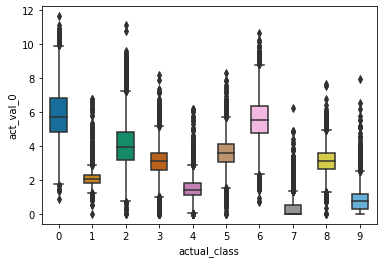

In [ ]:
# To see how closely the hidden node activation values correlate with the class labels
# Let us use seaborn for the boxplots this time.
bplot = sns.boxplot(y='act_val_0', x='actual_class', 
                 data=activation_df[['act_val_0','actual_class']], 
                 width=0.5,
                 palette="colorblind")

In [ ]:
# displaying the range of activation values 0 for each class labels
activation_df.groupby("actual_class")["act_val_0"].apply(lambda x: [round(min(x.tolist()),2),
 round(max(x.tolist()),2)]).reset_index().rename(columns={"act_val_0": "range_of_act_values"})

,actual_class,range_of_act_values
0,0,"[0.9, 11.64]"
1,1,"[0.01, 6.76]"
2,2,"[0.0, 11.13]"
3,3,"[0.0, 8.18]"
4,4,"[0.0, 6.2]"
5,5,"[0.0, 8.29]"
6,6,"[0.71, 10.67]"
7,7,"[0.0, 6.25]"
8,8,"[0.0, 7.64]"
9,9,"[0.0, 7.97]"


#**EXPERIMENT 2 (hidden layer with 2 nodes, 10 output)**
1. Build a DNN with 784 input nodes, a hidden layer with 2 nodes and 10 output nodes (corresponding to the 10 digits).
2. For each of the 60,000 images, the output of the two hidden nodes are plotted using a scatterplot. We color code the points according to which of the 10 classes the the output of the two nodes predicts.
3. Also compare the accuracy % & confusion matrix of Experiments 1 & 2. 

In [ ]:
tf.keras.backend.clear_session()  # For easy reset of notebook state.
model = Sequential()
model.add(Dense(units=2, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.001), input_shape=(image_size,)))
model.add(Dense( name = "output_layer", units=num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1570      
                                                                 
 output_layer (Dense)        (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# For use with non-categorical labels
model.compile(optimizer='rmsprop',           
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=50,
    mode='auto', baseline=None, restore_best_weights=False)

history = model.fit(X_train, y_train_encoded, epochs = 200, batch_size = 64, 
                    callbacks = [early_stopping], 
                    validation_data = (X_valid, y_valid_encoded))


Epoch 1/200
860/860 [==============================] - 3s 3ms/step - loss: 1.8194 - accuracy: 0.3613 - val_loss: 1.5936 - val_accuracy: 0.4318
Epoch 2/200
860/860 [==============================] - 2s 3ms/step - loss: 1.4726 - accuracy: 0.4711 - val_loss: 1.3887 - val_accuracy: 0.5252
Epoch 3/200
860/860 [==============================] - 2s 3ms/step - loss: 1.3228 - accuracy: 0.5458 - val_loss: 1.2849 - val_accuracy: 0.5512
Epoch 4/200
860/860 [==============================] - 2s 3ms/step - loss: 1.2537 - accuracy: 0.5734 - val_loss: 1.2325 - val_accuracy: 0.5804
Epoch 5/200
860/860 [==============================] - 2s 3ms/step - loss: 1.2101 - accuracy: 0.6035 - val_loss: 1.1948 - val_accuracy: 0.6094
Epoch 6/200
860/860 [==============================] - 2s 3ms/step - loss: 1.1756 - accuracy: 0.6322 - val_loss: 1.1629 - val_accuracy: 0.6336
Epoch 7/200
860/860 [==============================] - 2s 3ms/step - loss: 1.1470 - accuracy: 0.6493 - val_loss: 1.1401 - val_accuracy: 0.6520

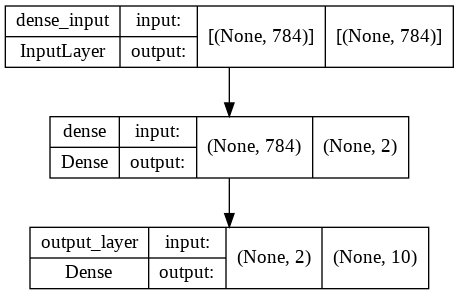

In [ ]:
keras.utils.plot_model(model, "mnist_experiment2.png", show_shapes=True)

Text(0.5, 1.0, 'Training and Validation Accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Training and Validation Loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

<Figure size 432x288 with 0 Axes>

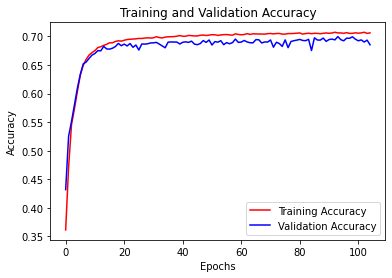

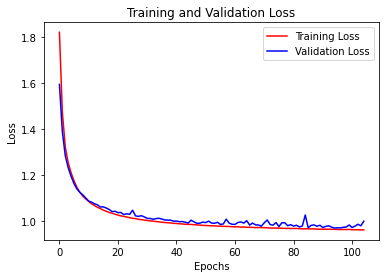

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = "bottom right")
plt.figure()
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = "upper right")
plt.figure()

In [ ]:
#Reviewing validation accuracy , precision and recall
y_pred_valid = model.predict(X_valid)
y_pred_valid = np.argmax(y_pred_valid, axis=1)
print("The accuracy percentage for validation dataset is {}".format(accuracy_score(Y_valid, y_pred_valid)))

The accuracy percentage for validation dataset is 0.6854


In [ ]:
print('The efficiency metrics for DNN Validation data is :')
print(classification_report(Y_valid, y_pred_valid))

The efficiency metrics for DNN Validation data is :
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       523
           1       0.77      0.95      0.85       568
           2       0.57      0.68      0.62       479
           3       0.49      0.54      0.52       496
           4       0.77      0.78      0.77       509
           5       0.51      0.36      0.42       480
           6       0.80      0.77      0.78       493
           7       0.84      0.77      0.80       499
           8       0.48      0.49      0.49       488
           9       0.76      0.65      0.70       465

    accuracy                           0.69      5000
   macro avg       0.68      0.68      0.68      5000
weighted avg       0.69      0.69      0.68      5000



Text(0.5, 1.05, 'Confusion Matrix for Validation dataset is')

Text(33.0, 0.5, 'Predicted Digits')

Text(0.5, 15.0, 'Actual Digits')

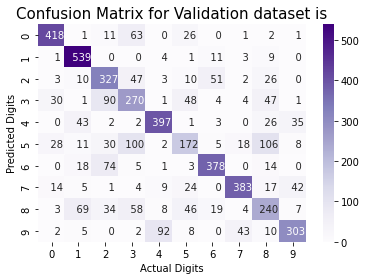

In [ ]:
sns.heatmap(metrics.confusion_matrix(Y_valid, y_pred_valid),annot=True,fmt='5.0f',cmap="Purples")
plt.title('Confusion Matrix for Validation dataset is', y=1.05, size=15)
plt.ylabel('Predicted Digits')
plt.xlabel('Actual Digits')

In [ ]:
#Test data accuracy , precision and recall
y_pred = model.predict(x_test_norm)
y_pred_test =np.argmax(y_pred, axis=1)
print("The accuracy percentage for test dataset is {}".format(accuracy_score(y_test, y_pred_test)))

The accuracy percentage for test dataset is 0.6948


In [ ]:
print('The efficiency metrics for DNN Test data is :')
print(classification_report(y_test, y_pred_test))

The efficiency metrics for DNN Test data is :
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       980
           1       0.78      0.96      0.86      1135
           2       0.62      0.72      0.66      1032
           3       0.49      0.54      0.51      1010
           4       0.74      0.81      0.78       982
           5       0.50      0.34      0.41       892
           6       0.79      0.75      0.77       958
           7       0.86      0.76      0.81      1028
           8       0.51      0.52      0.52       974
           9       0.82      0.67      0.74      1009

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



Text(0.5, 1.05, 'Confusion Matrix for Test dataset is')

Text(33.0, 0.5, 'Predicted Digits')

Text(0.5, 15.0, 'Actual Digits')

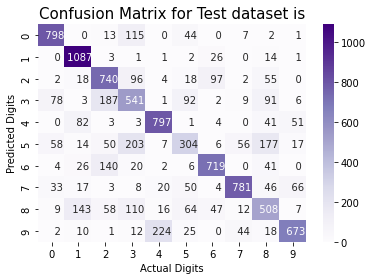

In [ ]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_test),annot=True,fmt='5.0f',cmap="Purples")
plt.title('Confusion Matrix for Test dataset is', y=1.05, size=15)
plt.ylabel('Predicted Digits')
plt.xlabel('Actual Digits')

<Figure size 864x576 with 0 Axes>

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=0 | pred=0 | true=7')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=1 | pred=0 | true=2')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=2 | pred=0 | true=1')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=3 | pred=0 | true=0')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=4 | pred=0 | true=4')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=5 | pred=0 | true=1')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=6 | pred=0 | true=4')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=7 | pred=0 | true=9')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=8 | pred=0 | true=5')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=9 | pred=0 | true=9')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=10 | pred=0 | true=0')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=11 | pred=0 | true=6')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=12 | pred=0 | true=9')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=13 | pred=0 | true=0')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=14 | pred=0 | true=1')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=15 | pred=0 | true=5')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=16 | pred=0 | true=9')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=17 | pred=0 | true=7')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=18 | pred=0 | true=3')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=19 | pred=0 | true=4')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=20 | pred=0 | true=9')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=21 | pred=0 | true=6')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=22 | pred=0 | true=6')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=23 | pred=0 | true=5')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'i=24 | pred=0 | true=4')

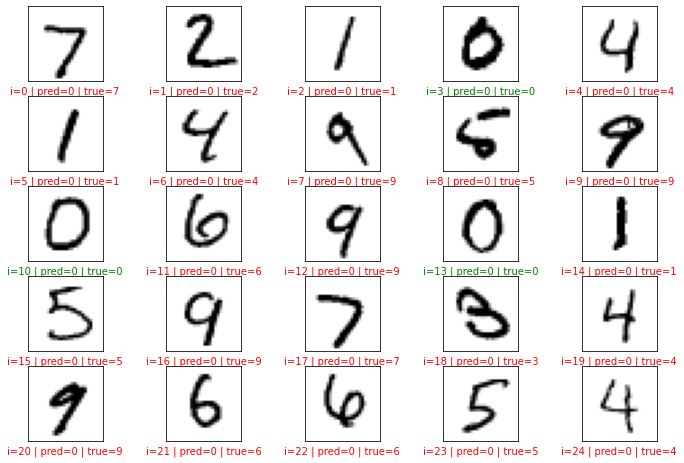

In [ ]:
#Visualizing the predicted labels for test dataset
plt.figure(figsize = (12, 8))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(y_pred_test[start_index + i])
    actual = np.argmax(y_test_encoded[start_index + i])
    col = 'g'
    if pred != actual:
        col = 'r'
    plt.xlabel('i={} | pred={} | true={}'.format(start_index + i, pred, actual), color = col)
    plt.imshow(x_test[start_index + i], cmap='binary')
plt.show()

For each of the 60,000 images, the output of the two hidden nodes are plotted using a scatterplot. We color code the points according to which of the 10 classes the the output of the two nodes predicts.

In [ ]:
#Creating the activation model 
#from tensorflow.keras import models

# Extracts the outputs of the 2 layers:
layer_outputs = [layer.output for layer in model.layers]

# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

print(f"There are {len(layer_outputs)} layers")
layer_outputs # description of the layers

There are 2 layers


[<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'output_layer')>]

In [ ]:
activations = activation_model.predict(x_train_norm)
hidden_layer_activation = activations[0]
hidden_layer_activation.shape   #  2 hidden node each has one activation value per training image

(60000, 2)

In [ ]:
hidden_node1_activation = hidden_layer_activation[:,0] # get activation values of the first hidden node
hidden_node2_activation = hidden_layer_activation[:,1] # get activation values of the second hidden node

print(f"The maximum activation value of the first hidden node is {hidden_node1_activation.max()}")
print(f"The maximum activation value of the second hidden node is {hidden_node2_activation.max()}")

The maximum activation value of the first hidden node is 11.617542266845703
The maximum activation value of the second hidden node is 7.160136699676514


In [ ]:
scatterPlot_df =  pd.DataFrame({'act_value_h1':hidden_node1_activation,
                                'act_value_h2':hidden_node2_activation,
                                'pred_class':pred_classes})
scatterPlot_df.head()

,act_value_h1,act_value_h2,pred_class
0,2.268711,0.559230,2
1,0.450570,0.000000,6
2,2.814484,3.920200,9
3,4.226273,4.272310,1
4,1.111184,4.462123,9


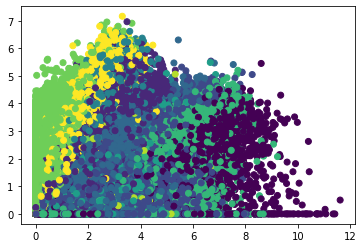

In [ ]:
#plt.legend(loc='upper left', prop={'size':6}, bbox_to_anchor=(1,1),ncol=1)
plt.scatter(scatterPlot_df.act_value_h1, 
            scatterPlot_df.act_value_h2, 
            c=scatterPlot_df.pred_class,
            label=scatterPlot_df.pred_class)
plt.show()

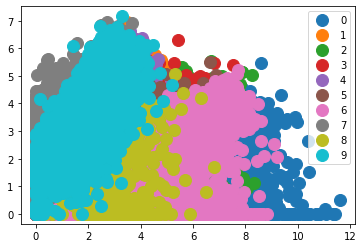

In [ ]:
groups = scatterPlot_df.groupby('pred_class')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.act_value_h1, group.act_value_h2, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

# **EXPERIMENT 3 (hidden layer with 128 nodes and 10 output**

In [ ]:
# A simple DNN with 784 input nodes, a hidden layer with 128 nodes and 10 output nodes (corresponding to the 10 digits)
image_size = 784 # 28*28
num_classes = 10 # ten unique digits

model = Sequential()
model.add(Dense(units=128, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.001), input_shape=(image_size,)))
model.add(Dense( name = "output_layer", units=num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# For use with non-categorical labels
model.compile(optimizer='adam',           
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=50,
    mode='auto', baseline=None, restore_best_weights=False)

history = model.fit(X_train, y_train_encoded, epochs = 200, batch_size = 64, callbacks = [early_stopping], validation_data = (X_valid, y_valid_encoded))


Epoch 1/200
860/860 [==============================] - 3s 3ms/step - loss: 0.4372 - accuracy: 0.9104 - val_loss: 0.2883 - val_accuracy: 0.9460
Epoch 2/200
860/860 [==============================] - 2s 2ms/step - loss: 0.2492 - accuracy: 0.9539 - val_loss: 0.2349 - val_accuracy: 0.9556
Epoch 3/200
860/860 [==============================] - 2s 2ms/step - loss: 0.2097 - accuracy: 0.9620 - val_loss: 0.2087 - val_accuracy: 0.9604
Epoch 4/200
860/860 [==============================] - 2s 3ms/step - loss: 0.1884 - accuracy: 0.9669 - val_loss: 0.2035 - val_accuracy: 0.9620
Epoch 5/200
860/860 [==============================] - 2s 2ms/step - loss: 0.1750 - accuracy: 0.9697 - val_loss: 0.1881 - val_accuracy: 0.9618
Epoch 6/200
860/860 [==============================] - 2s 2ms/step - loss: 0.1666 - accuracy: 0.9711 - val_loss: 0.1806 - val_accuracy: 0.9670
Epoch 7/200
860/860 [==============================] - 2s 2ms/step - loss: 0.1582 - accuracy: 0.9735 - val_loss: 0.1745 - val_accuracy: 0.9660

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


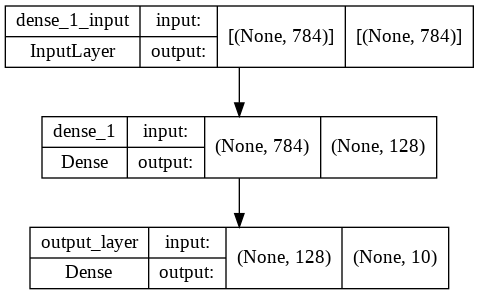

In [ ]:
keras.utils.plot_model(model, "mnist_experiment3.png", show_shapes=True)

Text(0.5, 1.0, 'Training and Validation Accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Training and Validation Loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

<Figure size 432x288 with 0 Axes>

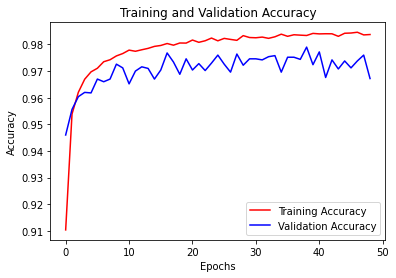

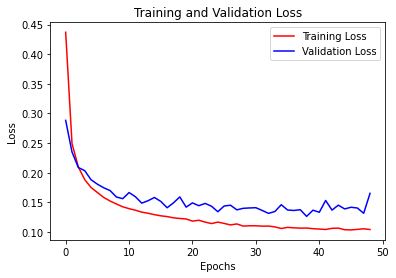

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = "bottom right")
plt.figure()
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = "upper right")
plt.figure()

In [ ]:
#Reviewing validation accuracy , precision and recall
y_pred_valid = model.predict(X_valid)
y_pred_valid = np.argmax(y_pred_valid, axis=1)
print("The accuracy percentage for validation dataset is {}".format(accuracy_score(Y_valid, y_pred_valid)))

The accuracy percentage for validation dataset is 0.9672


In [ ]:
print('The efficiency metrics for DNN Validation data is :')
print(classification_report(Y_valid, y_pred_valid))

The efficiency metrics for DNN Validation data is :
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       523
           1       0.96      0.99      0.97       568
           2       0.97      0.97      0.97       479
           3       0.95      0.98      0.96       496
           4       0.91      0.99      0.94       509
           5       0.99      0.96      0.97       480
           6       0.98      0.98      0.98       493
           7       0.99      0.97      0.98       499
           8       0.98      0.93      0.95       488
           9       0.97      0.93      0.95       465

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000



Text(0.5, 1.05, 'Confusion Matrix for Validation dataset is')

Text(33.0, 0.5, 'Predicted Digits')

Text(0.5, 15.0, 'Actual Digits')

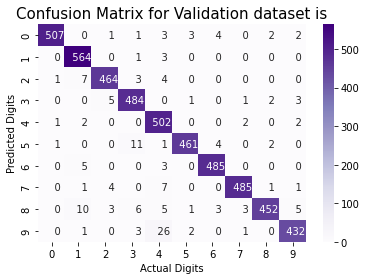

In [ ]:
sns.heatmap(metrics.confusion_matrix(Y_valid, y_pred_valid),annot=True,fmt='5.0f',cmap="Purples")
plt.title('Confusion Matrix for Validation dataset is', y=1.05, size=15)
plt.ylabel('Predicted Digits')
plt.xlabel('Actual Digits')

In [ ]:
#Reviewing validation accuracy , precision and recall
y_pred_test = model.predict(x_test_norm)
y_pred_test = np.argmax(y_pred_test, axis=1)
print("The accuracy percentage for test dataset is {}".format(accuracy_score(y_test, y_pred_test)))

The accuracy percentage for test dataset is 0.9685


In [ ]:
print('The efficiency metrics for DNN Test data is :')
print(classification_report(y_test, y_pred_test))

The efficiency metrics for DNN Test data is :
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.97      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.95      0.98      0.97      1010
           4       0.92      0.99      0.95       982
           5       0.97      0.96      0.96       892
           6       0.98      0.97      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.99      0.94      0.96       974
           9       0.98      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



Text(0.5, 1.05, 'Confusion Matrix for Test dataset is')

Text(33.0, 0.5, 'Predicted Digits')

Text(0.5, 15.0, 'Actual Digits')

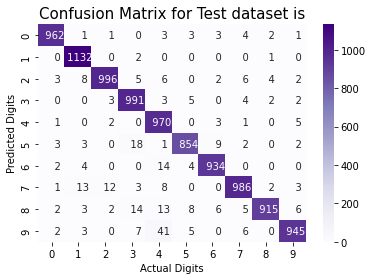

In [ ]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_test),annot=True,fmt='5.0f',cmap="Purples")
plt.title('Confusion Matrix for Test dataset is', y=1.05, size=15)
plt.ylabel('Predicted Digits')
plt.xlabel('Actual Digits')

# **EXPERIMENT 4(PCA - reduce dimensionality):**
1. Use PCA decomposition to reduce the number of dimensions of our training set of 28x28 dimensional MNIST images from 784 to 154 (with 95% of training images variance lying along these components).
2. We also reduce the number of dimensions of 'best' model from Experiment 3 to 154 inputs nodes and train it on the new lower dimensional data. We then compare the performance of Experiments 3 and 4.

In [ ]:
pca = PCA(0.95)
principalComponents = pca.fit_transform(x_train_norm)
principalDf = pd.DataFrame(data = principalComponents)
principalDf = principalDf.add_prefix('pca_')
principalDf.shape

(60000, 154)

In [ ]:
actual_class = pd.DataFrame(y_train, columns = ["actual_class"])
actual_class.head()

,actual_class
0,5
1,0
2,4
3,1
4,9


In [ ]:
pixel_pca_df = pd.concat([principalDf, actual_class ], axis = 1)

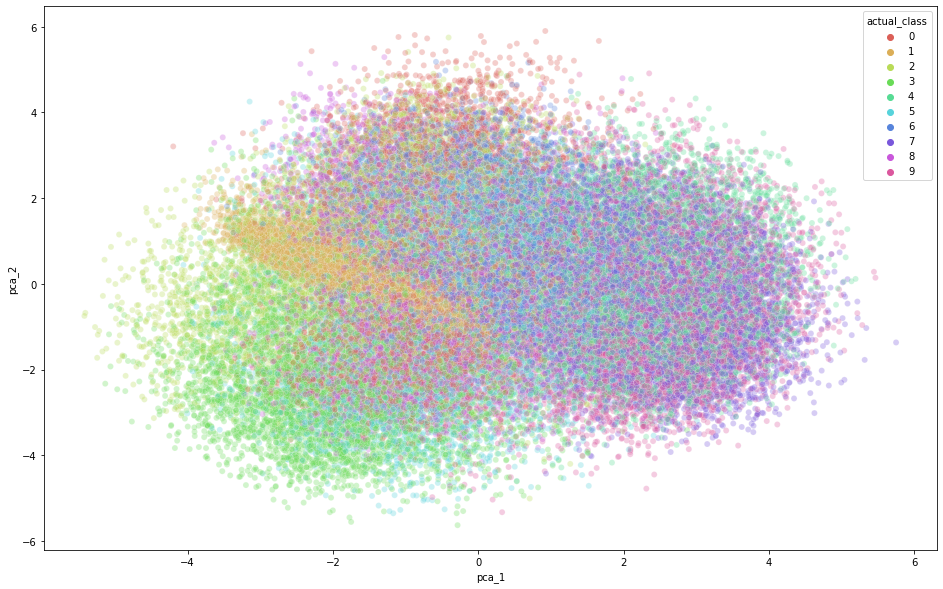

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca_1", y="pca_2",
    hue="actual_class",
    palette=sns.color_palette("hls", 10),
    data=pixel_pca_df,
    legend="full",
    alpha=0.3
);

In [ ]:
tf.keras.backend.clear_session()
image_size = 154
from keras.constraints import maxnorm
model = Sequential()
model.add(Dense(128, input_dim=(image_size), activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dense( name = "output_layer", units=num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               19840     
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 21,130
Trainable params: 21,130
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Splitting train dataset into train and validation datasets
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(principalDf, y_train, test_size=cross_validation_size, random_state=2)

In [ ]:
X_train.shape , X_valid.shape

((55000, 154), (5000, 154))

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(Y_train ,num_classes = 10)
y_valid_encoded = to_categorical(Y_valid ,num_classes = 10)
y_test_encoded = to_categorical(y_test , num_classes = 10)

In [ ]:
# For use with non-categorical labels
model.compile(optimizer='adam',           
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=50,
    mode='auto', baseline=None, restore_best_weights=False)

history = model.fit(X_train, y_train_encoded, 
                    epochs = 200, 
                    batch_size = 64, 
                    callbacks = [early_stopping], 
                    validation_data = (X_valid, y_valid_encoded))


Epoch 1/200
860/860 [==============================] - 3s 3ms/step - loss: 0.4149 - accuracy: 0.8916 - val_loss: 0.1986 - val_accuracy: 0.9420
Epoch 2/200
860/860 [==============================] - 2s 2ms/step - loss: 0.1499 - accuracy: 0.9576 - val_loss: 0.1398 - val_accuracy: 0.9602
Epoch 3/200
860/860 [==============================] - 2s 2ms/step - loss: 0.1015 - accuracy: 0.9723 - val_loss: 0.1102 - val_accuracy: 0.9688
Epoch 4/200
860/860 [==============================] - 2s 2ms/step - loss: 0.0746 - accuracy: 0.9793 - val_loss: 0.0973 - val_accuracy: 0.9698
Epoch 5/200
860/860 [==============================] - 2s 2ms/step - loss: 0.0575 - accuracy: 0.9846 - val_loss: 0.0856 - val_accuracy: 0.9742
Epoch 6/200
860/860 [==============================] - 2s 2ms/step - loss: 0.0450 - accuracy: 0.9887 - val_loss: 0.0786 - val_accuracy: 0.9772
Epoch 7/200
860/860 [==============================] - 2s 2ms/step - loss: 0.0353 - accuracy: 0.9912 - val_loss: 0.0789 - val_accuracy: 0.9786

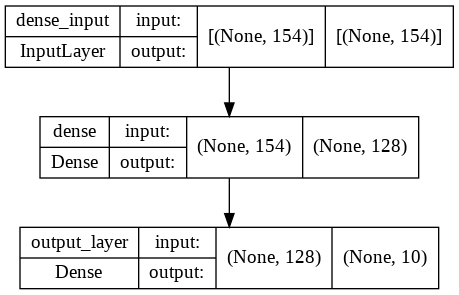

In [ ]:
keras.utils.plot_model(model, "mnist_experiment4.png", show_shapes=True)

Text(0.5, 1.0, 'Training and Validation Accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Training and Validation Loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

<Figure size 432x288 with 0 Axes>

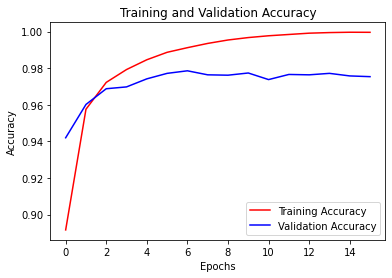

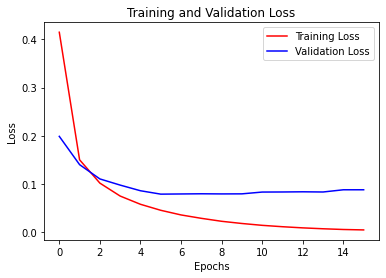

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = "bottom right")
plt.figure()
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = "upper right")
plt.figure()

In [ ]:
#Reviewing validation accuracy , precision and recall
y_pred_valid = model.predict(X_valid)
y_pred_valid = np.argmax(y_pred_valid, axis=1)
print("The accuracy percentage for validation dataset is {}".format(accuracy_score(Y_valid, y_pred_valid)))

The accuracy percentage for validation dataset is 0.9754


In [ ]:
print('The efficiency metrics for DNN Validation data is :')
print(classification_report(Y_valid, y_pred_valid))

The efficiency metrics for DNN Validation data is :
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       523
           1       0.98      0.99      0.98       568
           2       0.97      0.97      0.97       479
           3       0.97      0.96      0.96       496
           4       0.97      0.98      0.98       509
           5       0.97      0.98      0.97       480
           6       0.98      0.98      0.98       493
           7       0.98      0.98      0.98       499
           8       0.98      0.97      0.97       488
           9       0.97      0.97      0.97       465

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000



Text(0.5, 1.05, 'Confusion Matrix for Validation dataset is')

Text(33.0, 0.5, 'Predicted Digits')

Text(0.5, 15.0, 'Actual Digits')

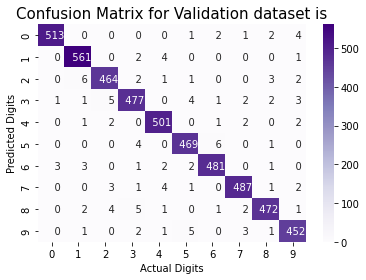

In [ ]:
sns.heatmap(metrics.confusion_matrix(Y_valid, y_pred_valid),annot=True,fmt='5.0f',cmap="Purples")
plt.title('Confusion Matrix for Validation dataset is', y=1.05, size=15)
plt.ylabel('Predicted Digits')
plt.xlabel('Actual Digits')

In [ ]:
#Transforming the test dataset
pca_test = pca.transform(x_test_norm)
principalDf_test = pd.DataFrame(data = pca_test)
principalDf_test = principalDf_test.add_prefix('pca_')

In [ ]:
principalDf_test.shape

(10000, 154)

In [ ]:
#Reviewing validation accuracy , precision and recall
y_pred_test = model.predict(principalDf_test)
y_pred_test = np.argmax(y_pred_test, axis=1)
print("The accuracy percentage for test dataset is {}".format(accuracy_score(y_test, y_pred_test)))

The accuracy percentage for test dataset is 0.9794


In [ ]:
print('The efficiency metrics for DNN Test data is :')
print(classification_report(y_test, y_pred_test))

The efficiency metrics for DNN Test data is :
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Text(0.5, 1.05, 'Confusion Matrix for Test dataset is')

Text(33.0, 0.5, 'Predicted Digits')

Text(0.5, 15.0, 'Actual Digits')

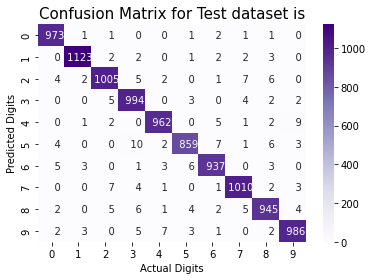

In [ ]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_test),annot=True,fmt='5.0f',cmap="Purples")
plt.title('Confusion Matrix for Test dataset is', y=1.05, size=15)
plt.ylabel('Predicted Digits')
plt.xlabel('Actual Digits')

# **EXPERIMENT 5 (Random Forest with reduce features)**: 
1.   We use a Random Forest classifier to get the relative importance of the 784 features (pixels) of the 28x28 dimensional images in training set of MNIST images and select the top 70 features (pixels).
2.   We train our 'best' dense neural network using these 70 features and compare its performance to the the dense neural network models from EXPERIMENTS 3 and 4.

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16,random_state=42)
y_train_pred_rf = rnd_clf.fit(x_train_norm, y_train)

In [ ]:
n = 70
imp_arr = rnd_clf.feature_importances_
idx = (-imp_arr).argsort()[:n]          # get the indices of the 70 "most important" features/pixels
len(idx)

70

[Text(1, 0, 'Not important'), Text(1, 0, 'Very important')]

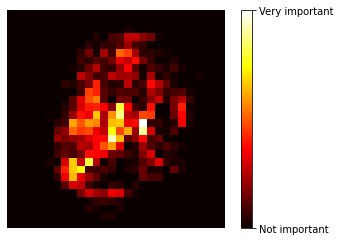

In [ ]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = 'hot',
               interpolation="nearest")
    plt.axis("off")

plot_digit(rnd_clf.feature_importances_)
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()

In [ ]:
# Create training and test images using just the 70 pixel locations obtained above
train_images_sm = x_train_norm[:,idx]
test_images_sm = x_test_norm[:,idx]
train_images_sm.shape, test_images_sm.shape # the reduced images have dimension 70

((60000, 70), (10000, 70))

In [ ]:
# to convert an index n, 0<= n < 784
def pair(n,size):
    x = n//size 
    y = n%size
    return x,y

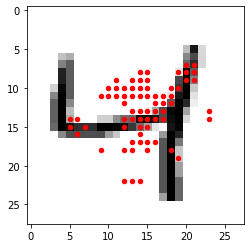

In [ ]:
plt.imshow(x_train_norm[2].reshape(28,28),cmap='binary')
x, y = np.array([pair(k,28) for k in idx]).T
plt.scatter(x,y,color='red',s=20)

In [ ]:
#Splitting train dataset into train and validation datasets
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(train_images_sm, y_train, test_size=cross_validation_size, random_state=2)

In [ ]:
X_train.shape , X_valid.shape

((55000, 70), (5000, 70))

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(Y_train ,num_classes = 10)
y_valid_encoded = to_categorical(Y_valid ,num_classes = 10)
y_test_encoded = to_categorical(y_test , num_classes = 10)

In [ ]:
tf.keras.backend.clear_session()
image_size = 70
from keras.constraints import maxnorm
model = Sequential()
model.add(Dense(128, input_dim=(image_size), activation='relu', 
                kernel_constraint=maxnorm(3)))
model.add(Dense( name = "output_layer", units=num_classes, 
                activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               9088      
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 10,378
Trainable params: 10,378
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# For use with non-categorical labels
model.compile(optimizer='adam',           
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=50,
    mode='auto', baseline=None, restore_best_weights=False)

history = model.fit(X_train, y_train_encoded, epochs = 200, batch_size = 64, callbacks = [early_stopping], validation_data = (X_valid, y_valid_encoded))


Epoch 1/200
860/860 [==============================] - 2s 2ms/step - loss: 0.6424 - accuracy: 0.8070 - val_loss: 0.4496 - val_accuracy: 0.8678
Epoch 2/200
860/860 [==============================] - 2s 2ms/step - loss: 0.4018 - accuracy: 0.8755 - val_loss: 0.3746 - val_accuracy: 0.8830
Epoch 3/200
860/860 [==============================] - 2s 2ms/step - loss: 0.3396 - accuracy: 0.8932 - val_loss: 0.3340 - val_accuracy: 0.8964
Epoch 4/200
860/860 [==============================] - 2s 2ms/step - loss: 0.2995 - accuracy: 0.9055 - val_loss: 0.3070 - val_accuracy: 0.9052
Epoch 5/200
860/860 [==============================] - 2s 2ms/step - loss: 0.2719 - accuracy: 0.9134 - val_loss: 0.2830 - val_accuracy: 0.9122
Epoch 6/200
860/860 [==============================] - 2s 2ms/step - loss: 0.2501 - accuracy: 0.9204 - val_loss: 0.2651 - val_accuracy: 0.9184
Epoch 7/200
860/860 [==============================] - 2s 2ms/step - loss: 0.2338 - accuracy: 0.9264 - val_loss: 0.2596 - val_accuracy: 0.9216

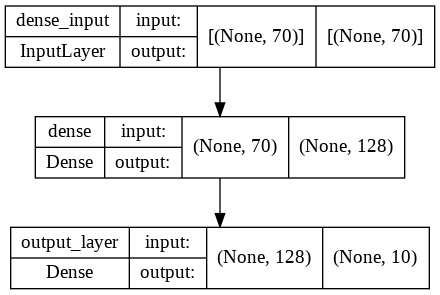

In [ ]:
keras.utils.plot_model(model, "mnist_experiment5.png", show_shapes=True)

Text(0.5, 1.0, 'Training and Validation Accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Training and Validation Loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

<Figure size 432x288 with 0 Axes>

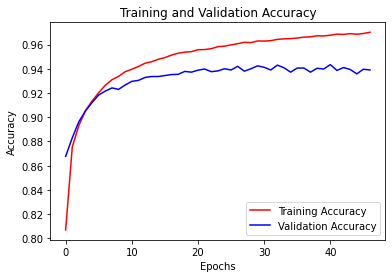

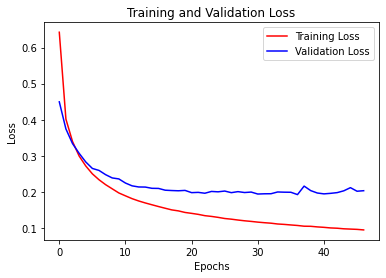

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = "bottom right")
plt.figure()
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = "upper right")
plt.figure()

In [ ]:
#Reviewing validation accuracy , precision and recall
y_pred_valid = model.predict(X_valid)
y_pred_valid = np.argmax(y_pred_valid, axis=1)
print("The accuracy percentage for validation dataset is {}".format(accuracy_score(Y_valid, y_pred_valid)))

The accuracy percentage for validation dataset is 0.939


In [ ]:
print('The efficiency metrics for DNN Validation data is :')
print(classification_report(Y_valid, y_pred_valid))

The efficiency metrics for DNN Validation data is :
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       523
           1       0.98      0.97      0.97       568
           2       0.91      0.94      0.92       479
           3       0.94      0.93      0.93       496
           4       0.89      0.95      0.92       509
           5       0.91      0.89      0.90       480
           6       0.98      0.95      0.96       493
           7       0.96      0.94      0.95       499
           8       0.93      0.94      0.94       488
           9       0.91      0.89      0.90       465

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000



Text(0.5, 1.05, 'Confusion Matrix for Validation dataset is')

Text(33.0, 0.5, 'Predicted Digits')

Text(0.5, 15.0, 'Actual Digits')

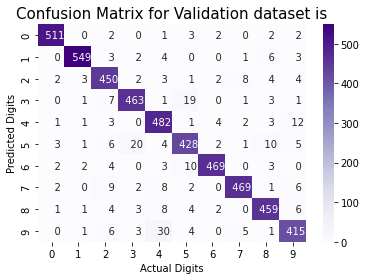

In [ ]:
sns.heatmap(metrics.confusion_matrix(Y_valid, y_pred_valid),annot=True,fmt='5.0f',cmap="Purples")
plt.title('Confusion Matrix for Validation dataset is', y=1.05, size=15)
plt.ylabel('Predicted Digits')
plt.xlabel('Actual Digits')

In [ ]:
y_pred_test = model.predict(test_images_sm)
y_pred_test = np.argmax(y_pred_test, axis=1)
print("The accuracy percentage for test dataset is {}".format(accuracy_score(y_test, y_pred_test)))

The accuracy percentage for test dataset is 0.9452


In [ ]:
print('The efficiency metrics for DNN Test data is :')
print(classification_report(y_test, y_pred_test))

The efficiency metrics for DNN Test data is :
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.99      0.98      0.98      1135
           2       0.93      0.95      0.94      1032
           3       0.93      0.93      0.93      1010
           4       0.90      0.95      0.92       982
           5       0.93      0.91      0.92       892
           6       0.97      0.94      0.96       958
           7       0.95      0.95      0.95      1028
           8       0.94      0.95      0.95       974
           9       0.94      0.90      0.92      1009

    accuracy                           0.95     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.95      0.95      0.95     10000



Text(0.5, 1.05, 'Confusion Matrix for Test dataset is')

Text(33.0, 0.5, 'Predicted Digits')

Text(0.5, 15.0, 'Actual Digits')

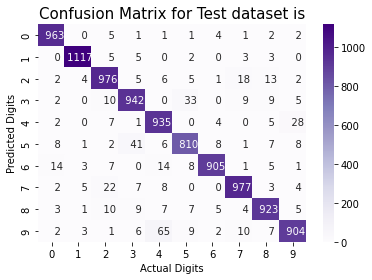

In [ ]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_test),annot=True,fmt='5.0f',cmap="Purples")
plt.title('Confusion Matrix for Test dataset is', y=1.05, size=15)
plt.ylabel('Predicted Digits')
plt.xlabel('Actual Digits')

# **EXPERIMENT 6 (Random Forest with reduce features (120))**: 
1.   We use a Random Forest classifier to get the relative importance of the 784 features (pixels) of the 28x28 dimensional images in training set of MNIST images and select the top 70 features (pixels).
2.   We train our 'best' dense neural network using these 70 features and compare its performance to the the dense neural network models from EXPERIMENTS 3 and 4.

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16,random_state=42)
y_train_pred_rf = rnd_clf.fit(x_train_norm, y_train)

In [ ]:
n = 120
imp_arr = rnd_clf.feature_importances_
idx = (-imp_arr).argsort()[:n]          # get the indices of the 120 "most important" features/pixels
len(idx)

120

[Text(1, 0, 'Not important'), Text(1, 0, 'Very important')]

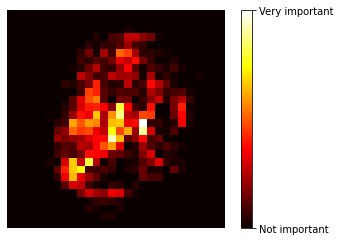

In [ ]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = 'hot',
               interpolation="nearest")
    plt.axis("off")

plot_digit(rnd_clf.feature_importances_)
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()

In [ ]:
# Create training and test images using just the 70 pixel locations obtained above
train_images_sm = x_train_norm[:,idx]
test_images_sm = x_test_norm[:,idx]
train_images_sm.shape, test_images_sm.shape # the reduced images have dimension 70

((60000, 120), (10000, 120))

In [ ]:
# to convert an index n, 0<= n < 784
def pair(n,size):
    x = n//size 
    y = n%size
    return x,y

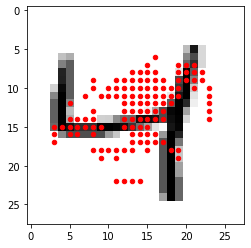

In [ ]:
plt.imshow(x_train_norm[2].reshape(28,28),cmap='binary')
x, y = np.array([pair(k,28) for k in idx]).T
plt.scatter(x,y,color='red',s=20)

In [ ]:
#Splitting train dataset into train and validation datasets
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(train_images_sm, y_train, test_size=cross_validation_size, random_state=2)

In [ ]:
X_train.shape , X_valid.shape

((55000, 120), (5000, 120))

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(Y_train ,num_classes = 10)
y_valid_encoded = to_categorical(Y_valid ,num_classes = 10)
y_test_encoded = to_categorical(y_test , num_classes = 10)

In [ ]:
tf.keras.backend.clear_session()
image_size = 120
from keras.constraints import maxnorm
model = Sequential()
model.add(Dense(128, input_dim=(image_size), activation='relu', 
                kernel_constraint=maxnorm(3)))
model.add(Dense( name = "output_layer", units=num_classes, 
                activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               15488     
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 16,778
Trainable params: 16,778
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# For use with non-categorical labels
model.compile(optimizer='adam',           
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=50,
    mode='auto', baseline=None, restore_best_weights=False)

history = model.fit(X_train, y_train_encoded, epochs = 200, batch_size = 64, callbacks = [early_stopping], validation_data = (X_valid, y_valid_encoded))


Epoch 1/200
860/860 [==============================] - 3s 3ms/step - loss: 0.4967 - accuracy: 0.8576 - val_loss: 0.3281 - val_accuracy: 0.9040
Epoch 2/200
860/860 [==============================] - 2s 2ms/step - loss: 0.2718 - accuracy: 0.9202 - val_loss: 0.2485 - val_accuracy: 0.9240
Epoch 3/200
860/860 [==============================] - 2s 2ms/step - loss: 0.2136 - accuracy: 0.9371 - val_loss: 0.2154 - val_accuracy: 0.9350
Epoch 4/200
860/860 [==============================] - 2s 2ms/step - loss: 0.1812 - accuracy: 0.9460 - val_loss: 0.1902 - val_accuracy: 0.9420
Epoch 5/200
860/860 [==============================] - 2s 2ms/step - loss: 0.1588 - accuracy: 0.9527 - val_loss: 0.1780 - val_accuracy: 0.9448
Epoch 6/200
860/860 [==============================] - 2s 2ms/step - loss: 0.1423 - accuracy: 0.9580 - val_loss: 0.1726 - val_accuracy: 0.9448
Epoch 7/200
860/860 [==============================] - 2s 2ms/step - loss: 0.1298 - accuracy: 0.9613 - val_loss: 0.1613 - val_accuracy: 0.9488

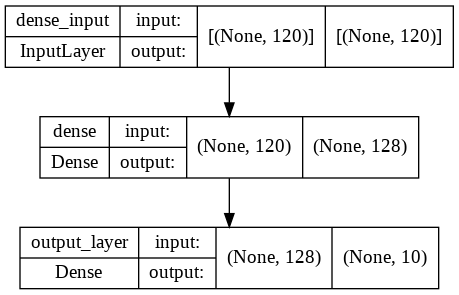

In [ ]:
keras.utils.plot_model(model, "mnist_experiment5.png", show_shapes=True)

Text(0.5, 1.0, 'Training and Validation Accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Training and Validation Loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

<Figure size 432x288 with 0 Axes>

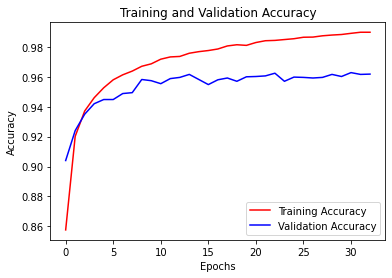

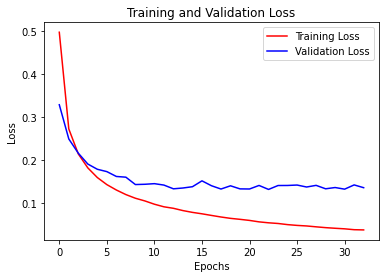

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = "bottom right")
plt.figure()
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = "upper right")
plt.figure()

In [ ]:
#Reviewing validation accuracy , precision and recall
y_pred_valid = model.predict(X_valid)
y_pred_valid = np.argmax(y_pred_valid, axis=1)
print("The accuracy percentage for validation dataset is {}".format(accuracy_score(Y_valid, y_pred_valid)))

The accuracy percentage for validation dataset is 0.9618


In [ ]:
print('The efficiency metrics for DNN Validation data is :')
print(classification_report(Y_valid, y_pred_valid))

The efficiency metrics for DNN Validation data is :
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       523
           1       0.97      0.98      0.98       568
           2       0.95      0.95      0.95       479
           3       0.95      0.95      0.95       496
           4       0.95      0.96      0.96       509
           5       0.96      0.96      0.96       480
           6       0.98      0.98      0.98       493
           7       0.96      0.98      0.97       499
           8       0.94      0.96      0.95       488
           9       0.95      0.93      0.94       465

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000



Text(0.5, 1.05, 'Confusion Matrix for Validation dataset is')

Text(33.0, 0.5, 'Predicted Digits')

Text(0.5, 15.0, 'Actual Digits')

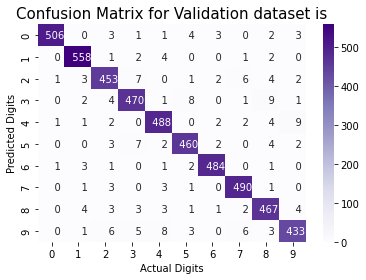

In [ ]:
sns.heatmap(metrics.confusion_matrix(Y_valid, y_pred_valid),annot=True,fmt='5.0f',cmap="Purples")
plt.title('Confusion Matrix for Validation dataset is', y=1.05, size=15)
plt.ylabel('Predicted Digits')
plt.xlabel('Actual Digits')

In [ ]:
y_pred_test = model.predict(test_images_sm)
y_pred_test = np.argmax(y_pred_test, axis=1)
print("The accuracy percentage for test dataset is {}".format(accuracy_score(y_test, y_pred_test)))

The accuracy percentage for test dataset is 0.9666


In [ ]:
print('The efficiency metrics for DNN Test data is :')
print(classification_report(y_test, y_pred_test))

The efficiency metrics for DNN Test data is :
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.96      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.95      0.96       982
           5       0.96      0.96      0.96       892
           6       0.97      0.97      0.97       958
           7       0.96      0.97      0.96      1028
           8       0.95      0.97      0.96       974
           9       0.97      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



Text(0.5, 1.05, 'Confusion Matrix for Test dataset is')

Text(33.0, 0.5, 'Predicted Digits')

Text(0.5, 15.0, 'Actual Digits')

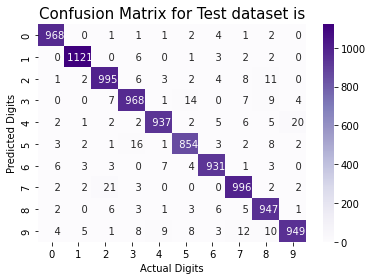

In [ ]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_test),annot=True,fmt='5.0f',cmap="Purples")
plt.title('Confusion Matrix for Test dataset is', y=1.05, size=15)
plt.ylabel('Predicted Digits')
plt.xlabel('Actual Digits')

# **EXPERIMENT 7&8 (hidden layer with 64 and 256 nodes and 10 output)**


In [ ]:
tf.keras.backend.clear_session()
from keras.constraints import maxnorm
image_size = 784
model = Sequential()
model.add(Dense(64, input_dim=(image_size), activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dense( name = "output_layer", units=num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Splitting train dataset into train and validation datasets
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train_norm, y_train, test_size=cross_validation_size, random_state=2)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(Y_train ,num_classes = 10)
y_valid_encoded = to_categorical(Y_valid ,num_classes = 10)
y_test_encoded = to_categorical(y_test , num_classes = 10)

In [ ]:
# For use with non-categorical labels
model.compile(optimizer='adam',           
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=50,
    mode='auto', baseline=None, restore_best_weights=False)

history = model.fit(X_train, y_train_encoded, epochs = 200, 
                    batch_size = 64, callbacks = [early_stopping], validation_data = (X_valid, y_valid_encoded))

Epoch 1/200
860/860 [==============================] - 3s 3ms/step - loss: 0.3685 - accuracy: 0.8999 - val_loss: 0.2244 - val_accuracy: 0.9326
Epoch 2/200
860/860 [==============================] - 2s 2ms/step - loss: 0.1822 - accuracy: 0.9485 - val_loss: 0.1656 - val_accuracy: 0.9524
Epoch 3/200
860/860 [==============================] - 2s 2ms/step - loss: 0.1348 - accuracy: 0.9611 - val_loss: 0.1419 - val_accuracy: 0.9602
Epoch 4/200
860/860 [==============================] - 2s 2ms/step - loss: 0.1096 - accuracy: 0.9678 - val_loss: 0.1328 - val_accuracy: 0.9580
Epoch 5/200
860/860 [==============================] - 2s 2ms/step - loss: 0.0940 - accuracy: 0.9726 - val_loss: 0.1178 - val_accuracy: 0.9632
Epoch 6/200
860/860 [==============================] - 2s 2ms/step - loss: 0.0811 - accuracy: 0.9763 - val_loss: 0.1117 - val_accuracy: 0.9658
Epoch 7/200
860/860 [==============================] - 2s 2ms/step - loss: 0.0716 - accuracy: 0.9795 - val_loss: 0.1111 - val_accuracy: 0.9644

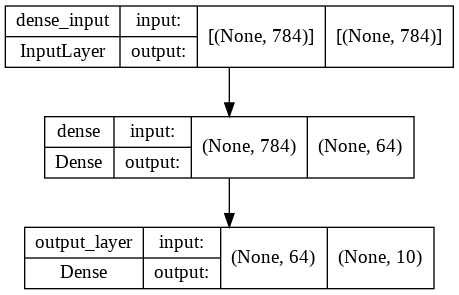

In [ ]:
keras.utils.plot_model(model, "mnist_experiment6.png", show_shapes=True)

Text(0.5, 1.0, 'Training and Validation Accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Training and Validation Loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

<Figure size 432x288 with 0 Axes>

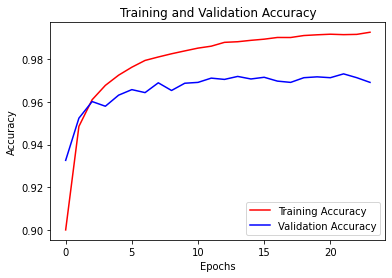

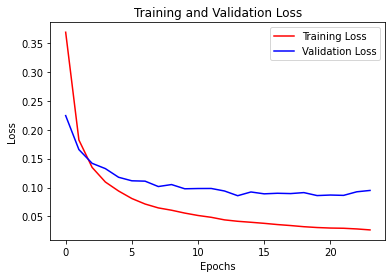

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = "bottom right")
plt.figure()
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = "upper right")
plt.figure()

In [ ]:
#Reviewing validation accuracy , precision and recall
y_pred_valid = model.predict(X_valid)
y_pred_valid = np.argmax(y_pred_valid, axis=1)
print("The accuracy percentage for validation dataset is {}".format(accuracy_score(Y_valid, y_pred_valid)))

The accuracy percentage for validation dataset is 0.9692


In [ ]:
print('The efficiency metrics for DNN Validation data is :')
print(classification_report(Y_valid, y_pred_valid))

The efficiency metrics for DNN Validation data is :
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       523
           1       0.98      0.99      0.98       568
           2       0.98      0.96      0.97       479
           3       0.93      0.97      0.95       496
           4       0.96      0.98      0.97       509
           5       0.97      0.95      0.96       480
           6       0.98      0.98      0.98       493
           7       0.97      0.98      0.97       499
           8       0.97      0.94      0.96       488
           9       0.96      0.96      0.96       465

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000



Text(0.5, 1.05, 'Confusion Matrix for Validation dataset is')

Text(33.0, 0.5, 'Predicted Digits')

Text(0.5, 15.0, 'Actual Digits')

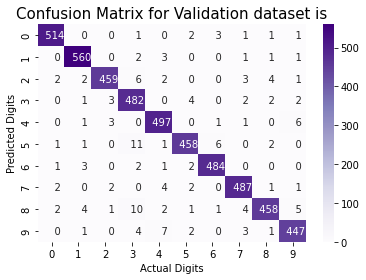

In [ ]:
sns.heatmap(metrics.confusion_matrix(Y_valid, y_pred_valid),annot=True,fmt='5.0f',cmap="Purples")
plt.title('Confusion Matrix for Validation dataset is', y=1.05, size=15)
plt.ylabel('Predicted Digits')
plt.xlabel('Actual Digits')

In [ ]:
#Reviewing validation accuracy , precision and recall
y_pred_test = model.predict(x_test_norm)
y_pred_test = np.argmax(y_pred_test, axis=1)
print("The accuracy percentage for test dataset is {}".format(accuracy_score(y_test, y_pred_test)))

The accuracy percentage for test dataset is 0.9749


In [ ]:
print('The efficiency metrics for DNN Test data is :')
print(classification_report(y_test, y_pred_test))

The efficiency metrics for DNN Test data is :
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.99      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.96      0.97       892
           6       0.98      0.97      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



Text(0.5, 1.05, 'Confusion Matrix for Test dataset is')

Text(33.0, 0.5, 'Predicted Digits')

Text(0.5, 15.0, 'Actual Digits')

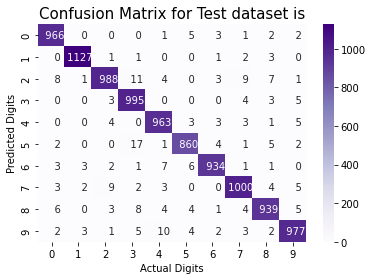

In [ ]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_test),annot=True,fmt='5.0f',cmap="Purples")
plt.title('Confusion Matrix for Test dataset is', y=1.05, size=15)
plt.ylabel('Predicted Digits')
plt.xlabel('Actual Digits')

# **EXPERIMENT 9 & 10(continue experiment 8 with 256 nodes and dropout)**

In [ ]:
tf.keras.backend.clear_session()
from keras.constraints import maxnorm
image_size = 784
model = Sequential()
model.add(Dense(256, input_dim=(image_size), activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense( name = "output_layer", units=num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Splitting train dataset into train and validation datasets
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train_norm, y_train, test_size=cross_validation_size, random_state=2)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(Y_train ,num_classes = 10)
y_valid_encoded = to_categorical(Y_valid ,num_classes = 10)
y_test_encoded = to_categorical(y_test , num_classes = 10)

In [ ]:
X_train.shape , X_valid.shape

((55000, 784), (5000, 784))

In [ ]:
# For use with non-categorical labels
model.compile(optimizer='adam',           
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=50,
    mode='auto', baseline=None, restore_best_weights=False)

history = model.fit(X_train, y_train_encoded, epochs = 200, batch_size = 64, callbacks = [early_stopping], validation_data = (X_valid, y_valid_encoded))


Epoch 1/200
860/860 [==============================] - 3s 3ms/step - loss: 0.2935 - accuracy: 0.9155 - val_loss: 0.1606 - val_accuracy: 0.9514
Epoch 2/200
860/860 [==============================] - 2s 2ms/step - loss: 0.1316 - accuracy: 0.9610 - val_loss: 0.1098 - val_accuracy: 0.9690
Epoch 3/200
860/860 [==============================] - 2s 2ms/step - loss: 0.0935 - accuracy: 0.9728 - val_loss: 0.0838 - val_accuracy: 0.9746
Epoch 4/200
860/860 [==============================] - 2s 2ms/step - loss: 0.0735 - accuracy: 0.9773 - val_loss: 0.0772 - val_accuracy: 0.9758
Epoch 5/200
860/860 [==============================] - 2s 2ms/step - loss: 0.0594 - accuracy: 0.9821 - val_loss: 0.0715 - val_accuracy: 0.9760
Epoch 6/200
860/860 [==============================] - 2s 2ms/step - loss: 0.0505 - accuracy: 0.9839 - val_loss: 0.0616 - val_accuracy: 0.9816
Epoch 7/200
860/860 [==============================] - 2s 2ms/step - loss: 0.0425 - accuracy: 0.9857 - val_loss: 0.0643 - val_accuracy: 0.9788

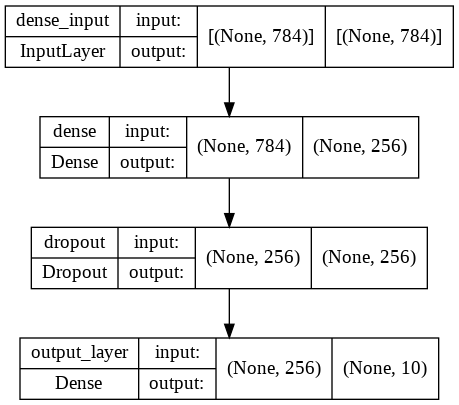

In [ ]:
keras.utils.plot_model(model, "mnist_experiment7.png", show_shapes=True)

Text(0.5, 1.0, 'Training and Validation Accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Training and Validation Loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

<Figure size 432x288 with 0 Axes>

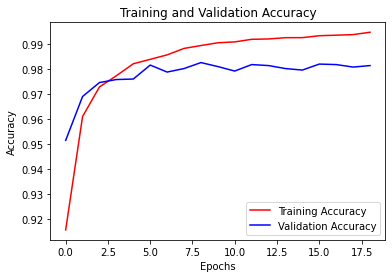

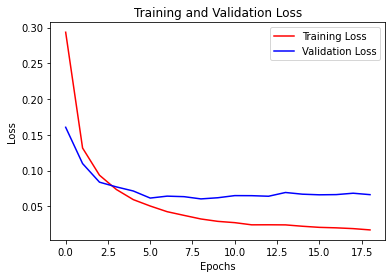

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = "bottom right")
plt.figure()
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = "upper right")
plt.figure()

In [ ]:
#Reviewing validation accuracy , precision and recall
y_pred_valid = model.predict(X_valid)
y_pred_valid = np.argmax(y_pred_valid, axis=1)
print("The accuracy percentage for validation dataset is {}".format(accuracy_score(Y_valid, y_pred_valid)))

The accuracy percentage for validation dataset is 0.9814


In [ ]:
print('The efficiency metrics for DNN Validation data is :')
print(classification_report(Y_valid, y_pred_valid))

The efficiency metrics for DNN Validation data is :
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       523
           1       0.98      1.00      0.99       568
           2       0.98      0.99      0.98       479
           3       0.98      0.97      0.97       496
           4       0.99      0.96      0.98       509
           5       0.99      0.98      0.98       480
           6       0.98      0.99      0.98       493
           7       0.97      0.99      0.98       499
           8       0.99      0.97      0.98       488
           9       0.97      0.97      0.97       465

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000



Text(0.5, 1.05, 'Confusion Matrix for Validation dataset is')

Text(33.0, 0.5, 'Predicted Digits')

Text(0.5, 15.0, 'Actual Digits')

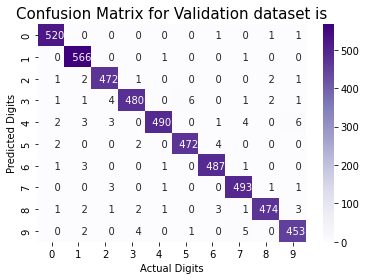

In [ ]:
sns.heatmap(metrics.confusion_matrix(Y_valid, y_pred_valid),annot=True,fmt='5.0f',cmap="Purples")
plt.title('Confusion Matrix for Validation dataset is', y=1.05, size=15)
plt.ylabel('Predicted Digits')
plt.xlabel('Actual Digits')

In [ ]:
y_pred_test = model.predict(x_test_norm)
y_pred_test = np.argmax(y_pred_test, axis=1)
print("The accuracy percentage for test dataset is {}".format(accuracy_score(y_test, y_pred_test)))

The accuracy percentage for test dataset is 0.9804


In [ ]:
print('The efficiency metrics for DNN Validation data is :')
print(classification_report(y_test, y_pred_test))

The efficiency metrics for DNN Validation data is :
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.96      0.98      0.97      1028
           8       0.97      0.98      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Text(0.5, 1.05, 'Confusion Matrix for Test dataset is')

Text(33.0, 0.5, 'Predicted Digits')

Text(0.5, 15.0, 'Actual Digits')

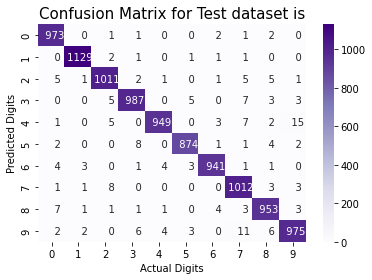

In [ ]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_test),annot=True,fmt='5.0f',cmap="Purples")
plt.title('Confusion Matrix for Test dataset is', y=1.05, size=15)
plt.ylabel('Predicted Digits')
plt.xlabel('Actual Digits')

# **EXPERIMENT 11 (Random Forest with reduce features (154) and dropout)**: 
1.   We use a Random Forest classifier to get the relative importance of the 784 features (pixels) of the 28x28 dimensional images in training set of MNIST images and select the top 70 features (pixels).
2.   We train our 'best' dense neural network using these 70 features and compare its performance to the the dense neural network models from EXPERIMENTS 3 and 4.

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16,random_state=42)
y_train_pred_rf = rnd_clf.fit(x_train_norm, y_train)

In [ ]:
n = 154
imp_arr = rnd_clf.feature_importances_
idx = (-imp_arr).argsort()[:n]          # get the indices of the 154 "most important" features/pixels
len(idx)

154

[Text(1, 0, 'Not important'), Text(1, 0, 'Very important')]

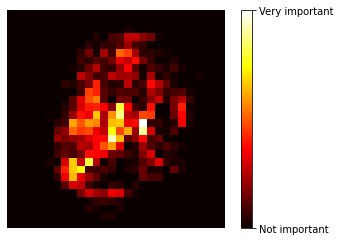

In [ ]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = 'hot',
               interpolation="nearest")
    plt.axis("off")

plot_digit(rnd_clf.feature_importances_)
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()

In [ ]:
# Create training and test images using just the 70 pixel locations obtained above
train_images_sm = x_train_norm[:,idx]
test_images_sm = x_test_norm[:,idx]
train_images_sm.shape, test_images_sm.shape # the reduced images have dimension 70

((60000, 154), (10000, 154))

In [ ]:
# to convert an index n, 0<= n < 784
def pair(n,size):
    x = n//size 
    y = n%size
    return x,y

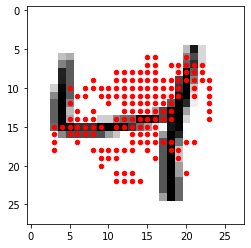

In [ ]:
plt.imshow(x_train_norm[2].reshape(28,28),cmap='binary')
x, y = np.array([pair(k,28) for k in idx]).T
plt.scatter(x,y,color='red',s=20)

In [ ]:
#Splitting train dataset into train and validation datasets
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(train_images_sm, y_train, test_size=cross_validation_size, random_state=2)

In [ ]:
X_train.shape , X_valid.shape

((55000, 154), (5000, 154))

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(Y_train ,num_classes = 10)
y_valid_encoded = to_categorical(Y_valid ,num_classes = 10)
y_test_encoded = to_categorical(y_test , num_classes = 10)

In [ ]:
tf.keras.backend.clear_session()
image_size = 154
from keras.constraints import maxnorm
model = Sequential()
model.add(Dense(128, input_dim=(image_size), activation='relu', 
                kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense( name = "output_layer", units=num_classes, 
                activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               19840     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 21,130
Trainable params: 21,130
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# For use with non-categorical labels
model.compile(optimizer='adam',           
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=50,
    mode='auto', baseline=None, restore_best_weights=False)

history = model.fit(X_train, y_train_encoded, epochs = 200, batch_size = 64, callbacks = [early_stopping], validation_data = (X_valid, y_valid_encoded))


Epoch 1/200
860/860 [==============================] - 3s 3ms/step - loss: 0.5112 - accuracy: 0.8478 - val_loss: 0.2916 - val_accuracy: 0.9140
Epoch 2/200
860/860 [==============================] - 2s 2ms/step - loss: 0.2706 - accuracy: 0.9196 - val_loss: 0.2203 - val_accuracy: 0.9314
Epoch 3/200
860/860 [==============================] - 2s 2ms/step - loss: 0.2159 - accuracy: 0.9348 - val_loss: 0.1868 - val_accuracy: 0.9426
Epoch 4/200
860/860 [==============================] - 2s 2ms/step - loss: 0.1834 - accuracy: 0.9445 - val_loss: 0.1678 - val_accuracy: 0.9500
Epoch 5/200
860/860 [==============================] - 2s 2ms/step - loss: 0.1616 - accuracy: 0.9521 - val_loss: 0.1480 - val_accuracy: 0.9566
Epoch 6/200
860/860 [==============================] - 2s 2ms/step - loss: 0.1462 - accuracy: 0.9557 - val_loss: 0.1380 - val_accuracy: 0.9590
Epoch 7/200
860/860 [==============================] - 2s 2ms/step - loss: 0.1331 - accuracy: 0.9596 - val_loss: 0.1313 - val_accuracy: 0.9594

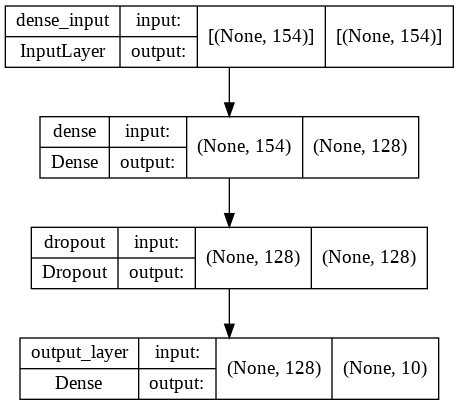

In [ ]:
keras.utils.plot_model(model, "mnist_experiment5.png", show_shapes=True)

Text(0.5, 1.0, 'Training and Validation Accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Training and Validation Loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

<Figure size 432x288 with 0 Axes>

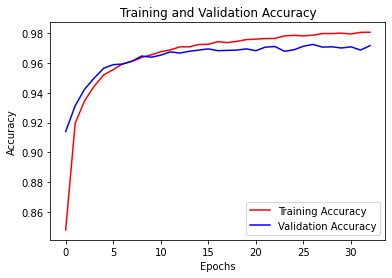

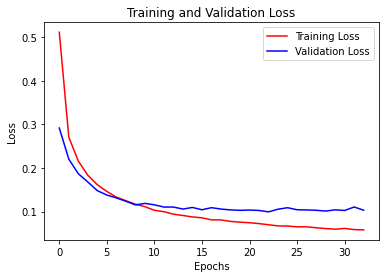

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = "bottom right")
plt.figure()
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = "upper right")
plt.figure()

In [ ]:
#Reviewing validation accuracy , precision and recall
y_pred_valid = model.predict(X_valid)
y_pred_valid = np.argmax(y_pred_valid, axis=1)
print("The accuracy percentage for validation dataset is {}".format(accuracy_score(Y_valid, y_pred_valid)))

The accuracy percentage for validation dataset is 0.9718


In [ ]:
print('The efficiency metrics for DNN Validation data is :')
print(classification_report(Y_valid, y_pred_valid))

The efficiency metrics for DNN Validation data is :
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       523
           1       0.98      0.99      0.98       568
           2       0.97      0.96      0.96       479
           3       0.96      0.97      0.96       496
           4       0.97      0.98      0.98       509
           5       0.98      0.95      0.96       480
           6       0.98      0.98      0.98       493
           7       0.98      0.98      0.98       499
           8       0.96      0.97      0.97       488
           9       0.96      0.97      0.97       465

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000



Text(0.5, 1.05, 'Confusion Matrix for Validation dataset is')

Text(33.0, 0.5, 'Predicted Digits')

Text(0.5, 15.0, 'Actual Digits')

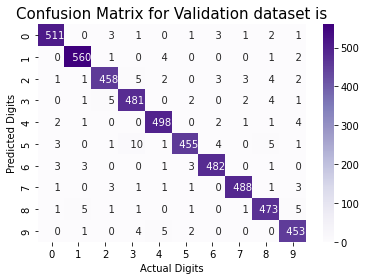

In [ ]:
sns.heatmap(metrics.confusion_matrix(Y_valid, y_pred_valid),annot=True,fmt='5.0f',cmap="Purples")
plt.title('Confusion Matrix for Validation dataset is', y=1.05, size=15)
plt.ylabel('Predicted Digits')
plt.xlabel('Actual Digits')

In [ ]:
y_pred_test = model.predict(test_images_sm)
y_pred_test = np.argmax(y_pred_test, axis=1)
print("The accuracy percentage for test dataset is {}".format(accuracy_score(y_test, y_pred_test)))

The accuracy percentage for test dataset is 0.9731


In [ ]:
print('The efficiency metrics for DNN Test data is :')
print(classification_report(y_test, y_pred_test))

The efficiency metrics for DNN Test data is :
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.97      0.97      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.97      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



Text(0.5, 1.05, 'Confusion Matrix for Test dataset is')

Text(33.0, 0.5, 'Predicted Digits')

Text(0.5, 15.0, 'Actual Digits')

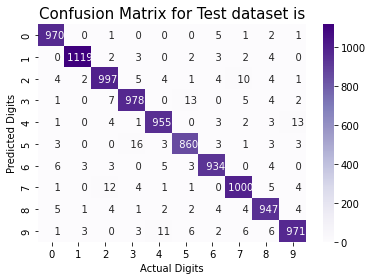

In [ ]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_test),annot=True,fmt='5.0f',cmap="Purples")
plt.title('Confusion Matrix for Test dataset is', y=1.05, size=15)
plt.ylabel('Predicted Digits')
plt.xlabel('Actual Digits')

# **EXPERIMENT 12 & 13(PCA - reduce dimensionality and dropout to both hidden and visible layer):**
1. Use PCA decomposition to reduce the number of dimensions of our training set of 28x28 dimensional MNIST images from 784 to 154 (with 95% of training images variance lying along these components).
2. We also reduce the number of dimensions of 'best' model from Experiment 3 to 154 inputs nodes and train it on the new lower dimensional data. We then compare the performance of Experiments 3 and 4.

In [ ]:
pca = PCA(0.95)
principalComponents = pca.fit_transform(x_train_norm)
principalDf = pd.DataFrame(data = principalComponents)
principalDf = principalDf.add_prefix('pca_')
principalDf.shape

(60000, 154)

In [ ]:
actual_class = pd.DataFrame(y_train, columns = ["actual_class"])
actual_class.head()

,actual_class
0,5
1,0
2,4
3,1
4,9


In [ ]:
pixel_pca_df = pd.concat([principalDf, actual_class ], axis = 1)

In [ ]:
tf.keras.backend.clear_session()
image_size = 154
from keras.constraints import maxnorm
model = Sequential()
model.add(Dropout(0.2, input_shape=(154,)))
model.add(Dense(128, input_dim=(image_size), activation='relu', kernel_constraint=maxnorm(3)))
#model.add(Dropout(0.2))
model.add(Dense( name = "output_layer", units=num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 154)               0         
                                                                 
 dense (Dense)               (None, 128)               19840     
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 21,130
Trainable params: 21,130
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Splitting train dataset into train and validation datasets
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(principalDf, y_train, test_size=cross_validation_size, random_state=2)

In [ ]:
X_train.shape , X_valid.shape

((55000, 154), (5000, 154))

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(Y_train ,num_classes = 10)
y_valid_encoded = to_categorical(Y_valid ,num_classes = 10)
y_test_encoded = to_categorical(y_test , num_classes = 10)

In [ ]:
# For use with non-categorical labels
model.compile(optimizer='adam',           
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=50,
    mode='auto', baseline=None, restore_best_weights=False)

history = model.fit(X_train, y_train_encoded, 
                    epochs = 200, 
                    batch_size = 64, 
                    callbacks = [early_stopping], 
                    validation_data = (X_valid, y_valid_encoded))


Epoch 1/200
860/860 [==============================] - 3s 3ms/step - loss: 0.6204 - accuracy: 0.8205 - val_loss: 0.2367 - val_accuracy: 0.9296
Epoch 2/200
860/860 [==============================] - 2s 2ms/step - loss: 0.3297 - accuracy: 0.9006 - val_loss: 0.1655 - val_accuracy: 0.9522
Epoch 3/200
860/860 [==============================] - 2s 3ms/step - loss: 0.2594 - accuracy: 0.9220 - val_loss: 0.1324 - val_accuracy: 0.9632
Epoch 4/200
860/860 [==============================] - 2s 3ms/step - loss: 0.2147 - accuracy: 0.9348 - val_loss: 0.1120 - val_accuracy: 0.9648
Epoch 5/200
860/860 [==============================] - 2s 2ms/step - loss: 0.1888 - accuracy: 0.9416 - val_loss: 0.0986 - val_accuracy: 0.9684
Epoch 6/200
860/860 [==============================] - 2s 2ms/step - loss: 0.1721 - accuracy: 0.9471 - val_loss: 0.0930 - val_accuracy: 0.9706
Epoch 7/200
860/860 [==============================] - 2s 3ms/step - loss: 0.1528 - accuracy: 0.9537 - val_loss: 0.0871 - val_accuracy: 0.9736

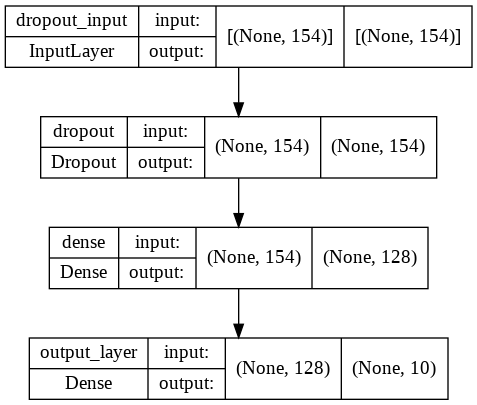

In [ ]:
keras.utils.plot_model(model, "mnist_experiment4.png", show_shapes=True)

Text(0.5, 1.0, 'Training and Validation Accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Training and Validation Loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

<Figure size 432x288 with 0 Axes>

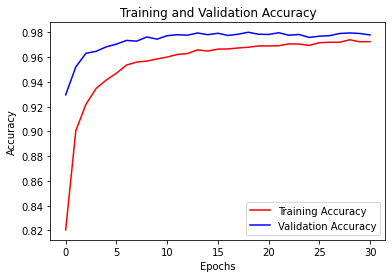

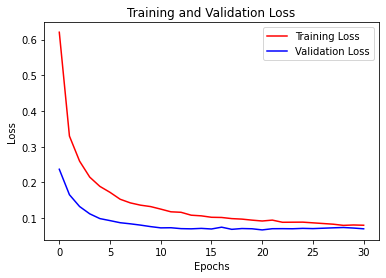

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = "bottom right")
plt.figure()
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = "upper right")
plt.figure()

In [ ]:
#Reviewing validation accuracy , precision and recall
y_pred_valid = model.predict(X_valid)
y_pred_valid = np.argmax(y_pred_valid, axis=1)
print("The accuracy percentage for validation dataset is {}".format(accuracy_score(Y_valid, y_pred_valid)))

The accuracy percentage for validation dataset is 0.978


In [ ]:
print('The efficiency metrics for DNN Validation data is :')
print(classification_report(Y_valid, y_pred_valid))

The efficiency metrics for DNN Validation data is :
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       523
           1       0.98      0.99      0.99       568
           2       0.97      0.97      0.97       479
           3       0.98      0.97      0.97       496
           4       0.98      0.98      0.98       509
           5       0.98      0.97      0.98       480
           6       0.97      0.99      0.98       493
           7       0.98      0.98      0.98       499
           8       0.99      0.95      0.97       488
           9       0.96      0.98      0.97       465

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000



Text(0.5, 1.05, 'Confusion Matrix for Validation dataset is')

Text(33.0, 0.5, 'Predicted Digits')

Text(0.5, 15.0, 'Actual Digits')

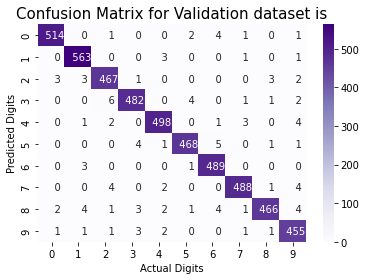

In [ ]:
sns.heatmap(metrics.confusion_matrix(Y_valid, y_pred_valid),annot=True,fmt='5.0f',cmap="Purples")
plt.title('Confusion Matrix for Validation dataset is', y=1.05, size=15)
plt.ylabel('Predicted Digits')
plt.xlabel('Actual Digits')

In [ ]:
#Transforming the test dataset
pca_test = pca.transform(x_test_norm)
principalDf_test = pd.DataFrame(data = pca_test)
principalDf_test = principalDf_test.add_prefix('pca_')

In [ ]:
principalDf_test.shape

(10000, 154)

In [ ]:
#Reviewing validation accuracy , precision and recall
y_pred_test = model.predict(principalDf_test)
y_pred_test = np.argmax(y_pred_test, axis=1)
print("The accuracy percentage for test dataset is {}".format(accuracy_score(y_test, y_pred_test)))

The accuracy percentage for test dataset is 0.9814


In [ ]:
print('The efficiency metrics for DNN Test data is :')
print(classification_report(y_test, y_pred_test))

The efficiency metrics for DNN Test data is :
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Text(0.5, 1.05, 'Confusion Matrix for Test dataset is')

Text(33.0, 0.5, 'Predicted Digits')

Text(0.5, 15.0, 'Actual Digits')

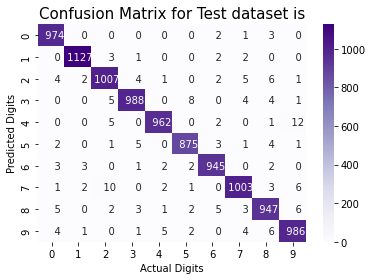

In [ ]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_test),annot=True,fmt='5.0f',cmap="Purples")
plt.title('Confusion Matrix for Test dataset is', y=1.05, size=15)
plt.ylabel('Predicted Digits')
plt.xlabel('Actual Digits')